# Phase Diagrams and Phase Equilibria

## Motivation

Matter exists in three phases.  It can be useful to measure and ultimately predict the pressure and temperatures at which we expect matter to undergo a phase transition (e.g. at what temperature will water boil?  Does that depend on elevation?  Why?).  The Thermoydamic relationship that we have derived in previous notebooks allow us to predict this behavior.

## Learning Goals
 
After working through this notebook, you will be able to:

1. Identify states of matter and phase coexistence curves on a phase diagram,
2. Define triple point and critical point 
3. Predict phase coexistence relationships using the Clapeyron equation
4. Predict phase coexistence relatinships for solid-vapor and liquid-vapor using the Clausius-Clapeyron equation

## Coding Concepts

The following coding concepts are used in this notebook:
1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Phase Diagrams

The phase behavior of a substance can be summarized on a phase diagram.  A phase diagram is a plot of Pressure and Temperature with the phases of matter labeled and the phase coexistence curves plotted.  


Here we will show a plot of the $P$ vs $T$ for benzene.  The phase coexistence curves are given as

\begin{eqnarray}
\ln P &=& -\frac{4110}{T} + 18.33 \quad 278.7 < T < 300 \text{K} \quad \text{liquid-vapor}\\
\ln P &=& -\frac{5139}{T} + 22.67 \quad 250 < T < 278.7 \text{K} \quad \text{solid-vapor}\\
P &=& -25992\cdot(T-278.7) + 36.1 \quad 278.7  \text{K} < T \quad \text{solid-liquid}\\
\end{eqnarray}

Text(280, 20, 'Gas')

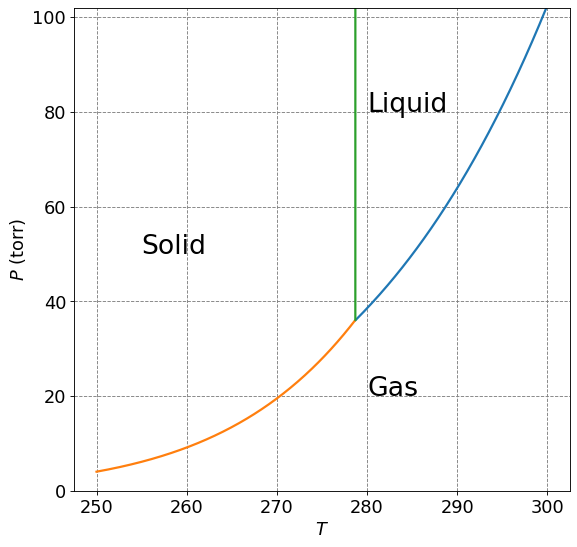

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$T$",size=fontsize)
ax.set_ylabel("$P$ (torr)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def p_l_v(T):  # 273<T<300
    return np.exp(-4110/T + 18.33)
def p_s_v(T): # 250<T<280
    return np.exp(-5319/T + 22.67)
def p_s_l(T):
    return 34.2 * 760 * (T-278.7) + 36.1
t_l_v = np.arange(278.7,300,0.1)
t_s_v = np.arange(250,278.7,0.1)
t_s_l = np.arange(278.7,278.7026,0.0001)
ax.plot(t_l_v,p_l_v(t_l_v),lw=2)
ax.plot(t_s_v,p_s_v(t_s_v),lw=2)
ax.plot(t_s_l,p_s_l(t_s_l),lw=2)
ax.set_ylim(0,102)
# Annotations
plt.annotate("Solid",(255,50),fontsize=24)
plt.annotate("Liquid",(280,80),fontsize=24)
plt.annotate("Gas",(280,20),fontsize=24)

There are three phases of matter: solid, liquid, and gas.  Solid tends to exist at low temperatures and high pressures, liquid at intermediate temperature and pressures, and gas at high temperatures and low pressures.  The curves that separate any of the two phases are called ***phase coexistence curves***.  These curves indicate the pressure and temperatures at which the two phases coexist at equilibrium.  The solid-liquid coexistence curve indicates the temperature and pressure at which you expect sublimation (or the reverse) to occur.  Similarly, the liquid-gas coexistence curve indicates the temperatures and pressures at which you expect vaporization to occur.  

The point at which all three curves meet is call the ***triple point***.  This point indicates a temperature and pressure at which all three phases of matter will exist in equilibrium with eachother.  

A ***critical point*** (not indicated on the plot above) is the point along the liquid-vapor coexistence curve above which the liquid will cease to exist.  

***normal melting point*** is the melting temperature at 760 torr ot 1 atm.  

***normal boiling point*** is the boiling temperature at 760 torr or 1 atm.

## Deriving Equations for Phase Coexistence Curves

Phase coexistence curves are points in $P$ ant $T$ space at which two phases of matter are in equilibrium.  We can use this relationship and equations that we have already learned from Thermodynamics to derive relationships for the phase coexistence curves.

We will consider the Gibbs free energy expression since each point in $P$ and $T$ space can be considered a position at which $P$ and $T$ are held constant.  Thus, $dG <0$ indicates sponataneity and $dG=0$ indicates equilibrium.  First, however, we must consider how to deal with the free energy of a two component system.

### Gibbs Free Energy of a Two Component System

For a single component system we have that 
\begin{equation}
dG = -SdT + VdP
\end{equation}
where $G(T,P)$ is the Gibbs free energy as a function of natural variables $T$ and $P$.  Technically, we can consider the Gibbs free energy of a single component system as a function of three fixed variables: $T$, $P$, and $N$.  The differntial form is
\begin{equation}
dG = -SdT + VdP + \mu dN
\end{equation}
where $\mu = \left(\frac{\partial G}{\partial N}\right)_{T,P}$ is called the chemical potential of the species.  This quantity can be thought of as the amount that the Gibbs free energy (an extensive variable) will change due to the change in the number of amount ($dN$) of the species.  

For a two component system with fixed number of moles, $N$, we have that $N = n_A + n_B$ and 
\begin{equation}
dG  = -SdT + VdP + \mu_Adn_A + \mu_Ndn_B
\end{equation}
where 
\begin{eqnarray}
\mu_A &=& \left(\frac{\partial G}{\partial n_A}\right)_{n_B,T,P} \\
\mu_B &=& \left(\frac{\partial G}{\partial n_B}\right)_{n_A,T,P}
\end{eqnarray}
are the chemical potentials of species $A$ and $B$, respectively.

Under constant temperature ($dT = 0$) and pressure ($dP = 0$) conditions we have 
\begin{equation}
dG  = \mu_Adn_A + \mu_Ndn_B
\end{equation}
for the two component system.  Since the number of moles is fixed ($N = constant$) and $N = n_A + n_B$ we have that
\begin{eqnarray}
dN &=& dn_A + dn_B \\
0 &=& dn_A + dn_B \\
\Rightarrow dn_A = -dn_B
\end{eqnarray}
Thus, the $dG$ can be written as
\begin{eqnarray}
dG = (\mu_A - \mu_B)dn_A
\end{eqnarray}

A spontaneous process will have $dG < 0$.  This can be achieved in two ways:
\begin{eqnarray}
1. \mu_A &<& \mu_B \quad \text{and} \quad dn_A > 0 \\
2. \mu_A &>& \mu_B \quad \text{and} \quad dn_A < 0
\end{eqnarray}
Either case means that the system will flow towards the species with the lower chemical potential.


If this system is at equilibrium we have that $dG = 0$ and thus
\begin{eqnarray}
0  &=& (\mu_A - \mu_B)dn_A \\
\Rightarrow \mu_A &=& \mu_B
\end{eqnarray}
The last relationship holds because, even at equilibrium, we cannot assume that $dn_A$ (or $dn_B$ for that matter) is zero because of the dynamic nature of equilibrium.  

*This last equality states that the chemical potentials of two components in equilibrium are equivalent.*  

## The Claperyon Equation

We can use the last outcome of two component systems to derive a relationship between the pressure of the two components.  Here we will consider the two components to be the same species but in different phases, like the water vapor in equilibrium with its liquid.  

We start this derivation by using a property of chemical potential.  That is, that the chemical potential can considered the molar Gibbs free energy of that component of the system.  Thus
\begin{equation}
\mu_A(T,P) = \mu_B(T,P)
\end{equation}
where we have explicitly identified that both $\mu_A$ and $\mu_B$ are functions of $T$ and $P$.  Taking the differentials of both sides of this last equation we get
\begin{eqnarray}
d\mu_A(T,P) &=& d\mu_B(T,P) \\
\left(\frac{\partial \mu_A}{\partial P}\right)_TdP + \left(\frac{\partial \mu_A}{\partial T}\right)_PdT &=& \left(\frac{\partial \mu_B}{\partial P}\right)_TdP + \left(\frac{\partial \mu_B}{\partial T}\right)_PdT \\
\bar{V}_AdP - \bar{S}_AdT &=& \bar{V}_BdP - \bar{S}_BdT\\
\Rightarrow \frac{dP}{dT} &=& \frac{\bar{S}_B - \bar{S}_A}{\bar{V}_B- \bar{V}_A}
\end{eqnarray}
where we divided by $dT$ and solved for $\frac{dP}{dT}$ to get the last equation.

If we now consider the case of a phase transition (e.g. $A = liquid$ and $B=vapor$) then we get $\bar{S}_B - \bar{S}_A = \Delta \bar{S}_{Tr}$ and $\bar{V}_B - \bar{V}_A = \Delta \bar{V}_{Tr}$.  Substituting this into the above equation for $\frac{dP}{dT}$ we get
\begin{eqnarray}
\frac{dP}{dT} &=& \frac{\Delta\bar{S}_{Tr}}{\Delta\bar{V}_{Tr}} \\
&=& \frac{\Delta\bar{H}_{Tr}}{T\Delta\bar{V}_{Tr}}
\end{eqnarray}
where we have used $\Delta S_{Tr} = \frac{\Delta H_{Tr}}{T}$ in the last equality.  This equation is called the ***Clapyeron equation*** and relates the slope of the two-phases coexistence curve in a $P$ vs $T$ plot to the enthalpy of the phase transition.

### Example 1: Melting of Benzene

Given the following Thermodynamic data for benzene
\begin{eqnarray}
\Delta \bar{H}_{fusion} &=& 9.95 \quad \text{kJ}\cdot\text{mol}^{-1} \\
T_{fusion} &=& 278.7\quad \text{K}\\
\Delta \bar{V}_{fusion} &=& 10.3 \quad\text{mL}\cdot\text{mol}^{-1}
\end{eqnarray}
Compute the pressure at which the melting temperature of benzene is $T = 300$ K.

*Solution:*

We will use the Clapeyron equation:
\begin{eqnarray}
\frac{dP}{dT} &=& \frac{\Delta\bar{H}_{fusion}}{T\Delta\bar{V}_{fusion}}\\
&=& \frac{9.95\times10^3\text{J}\cdot\text{mol}^{-1}}{278.7\cdot10.3\text{K}\cdot\text{mL}\cdot\text{mol}^{-1}}\cdot\frac{1000 \text{mL}}{1\text{L}}\cdot\frac{0.08206\text{L}\cdot\text{atm}\cdot\text{mol}^{-1}\text{K}^{-1}}{8.314\text{J}\cdot{mol}^{-1}\cdot\text{K}^{-1}} \\
&=& 34.2 \quad\text{atm}\cdot{K}^{-1}
\end{eqnarray}
This is the slope of the $P$ vs $T$ curve at $T=278.7$ K and $P = 1$ atm, if we assume the curve is linear we can determine the change in $P$ for a given change in $T$.
\begin{eqnarray}
\frac{dP}{dT} &=&  34.2 \quad\text{atm}\cdot{K}^{-1} \approx \frac{\Delta P}{\Delta T} \\
\Rightarrow \Delta P &=& 34.2 \Delta T \\
&=& 34.2\left(300-278.7\right) \\
&=& 728.46 \quad\text{atm}
\end{eqnarray}
Thus, the pressure that has a melting temperature of $300$ K is 
\begin{equation}
P = 1+728.46 = 729 \quad \text{atm}
\end{equation}

In [32]:
print(34.2*(300-278.7))
print(1 + 34.2*(300-278.7) )

728.4600000000005
729.4600000000005


## The Clausis-Clapeyron Equation

Application of the Clapeyron equation to liquid-vapor or solid-vapor equilibria lends itself to further approximations.  Start with the Clapeyron equation for the liquid-vapor
\begin{eqnarray}
\frac{dP}{dT} = \frac{\Delta\bar{H}_{vap}}{T\left(\bar{V}_g - \bar{V}_l\right)}
\end{eqnarray}
Here, we will, in general, have $\bar{V}_g >> \bar{V}_l$ allowing us to ignore the volume of the liquid.  Additionally, we can approximate the volume of the vapor by that of an ideal gas yielding:
\begin{eqnarray}
\frac{dP}{dT} &=& P\frac{\Delta\bar{H}_{vap}}{RT^2} \\
\Rightarrow \frac{1}{P} \frac{dP}{dT} &=& \frac{\Delta\bar{H}_{vap}}{RT^2} \\
\frac{d\ln P}{dT}&=& \frac{\Delta\bar{H}_{vap}}{RT^2}
\end{eqnarray}
This last equation is the standard form of the ***Clausius-Clapeyron equation***.  This equation is an approximation to the Clapeyron equation that is holds only for solid-vapor and liquid-vapor equilibria far from the triple point.  Regardless, this form is useful because it allows us to integrate.

Multiplying both side of the Clausius-Clapeyron equation by $dT$ and then integrating from $(P_1,T_1)$ to $(P_2,T_2)$ yields
\begin{eqnarray}
\int_{P_1}^{P_2} d\ln P &=& \int_{T_1}^{T_2}\frac{\Delta\bar{H}_{vap}}{RT^2}dT\\
\ln\frac{P_2}{P_1} &=& -\frac{\Delta\bar{H}_{vap}}{R}\left(\frac{1}{T_2}-\frac{1}{T_1} \right)
\end{eqnarray}

This equation allows us to compute the vapor pressure at some temperature given the heat of vaporization and the vapor pressure at a different temperature.  

Multiplying both side of the Clausius-Clapeyron equation by $dT$ and then performing indefinite integration yields
\begin{eqnarray}
\int d\ln P &=& \int\frac{\Delta\bar{H}_{vap}}{RT^2}dT\\
\ln P + C &=& -\frac{\Delta\bar{H}_{vap}}{RT} + D \\
\ln P &=& -\frac{\Delta\bar{H}_{vap}}{RT} + constant
\end{eqnarray}

This last equation can be used to determine the heat of vaporization from vapor pressure as a function of temperature data. A note on units of this equation.  The units of pressure for this equation are wrapped up in the constant.  If you fit data in units of torr, then your pressures will all be torr. 

### Example 2: Determine $\Delta \bar{H}_{sub}$ for I$_2$

The vapor pressure for solid iodine is given by
\begin{equation}
\ln(P/atm) = -\frac{8090.0\text{K}}{T} - 2.013\ln(T/\text{K}) + 32.908
\end{equation}
Use this equation to calculate the normal sublimation temperature and the molar enthalpy of sublimation of I$_2$ at 25$^\circ$C ($\Delta\bar{H}(25^\circ\text{C})$).  The experimental value is $\Delta\bar{H}(25^\circ\text{C})=62.23$ kJ/mol.

*Solution:*

To find the *normal* sublimation temperature, we set $P=1$ atm in the above equation and solve for $T$:
\begin{eqnarray}
\ln(1) &=& -\frac{8090.0}{T_{sub}} - 2.013\ln(T_{sub}) + 32.908 \\
0 &=& -\frac{8090.0}{T_{sub}} - 2.013\ln(T_{sub}) + 32.908
\end{eqnarray}
This is a non-linear equation for $T_{sub}$ and not straightforward to solve.  Below I will use an iterative non-linear roots solver to get an answer.

In [4]:
from scipy.optimize import fsolve
import numpy as np
f = lambda T : -8090/T -2.013*np.log(T) + 32.908
guess = 300.0
print("Normal sublimation temperature:", np.round(fsolve(f,guess)[0],1), "K")

Normal sublimation temperature: 386.8 K



To solve for $\Delta\bar{H}_{vap}(25^\circ\text{C})$ will use the Clausius-Clapeyron equation
\begin{eqnarray}
\frac{d\ln P}{dT}&=& \frac{\Delta\bar{H}_{sub}}{RT^2} \\
&=& \frac{8090.0}{T^2} - \frac{2.013}{T} \\
&=& \frac{8090.0-2.013T}{T^2} \\
\Rightarrow
\Delta\bar{H}_{sub} &=& R(8090.0-2.013T)
\end{eqnarray}

Now sub in 25$^\circ$C to get

\begin{equation}
\Delta\bar{H}_{sub}(298.15\text{K}) = 62.27\quad \text{kJ}\cdot\text{mol}^{-1}
\end{equation}

We see that this value is not far off from the experimental value of $\Delta\bar{H}(25^\circ\text{C})=62.23$ kJ/mol

In [34]:
print(8.314/1000*(8090-2.013*(25+273.15)), "kJ/mol")

62.2703971517 kJ/mol


### Example 3: Molar Enthalpy of Vaporization for Palladium

Use the following data to estimate the molar enthalpy of vaporization ($\Delta\bar{H}_{vap}$) for palladium

| T/K   |             P/bar   |
|:------|:--------------------|
| 1587  | $1.002\times10^{-9}$|
| 1624  | $2.152\times10^{-9}$|
| 1841  | $7.499\times10^{-8}$|

*Solution:*

We will use the Clausius-Clapeyron equation of the form
\begin{equation}
\ln(P/bar) = -\frac{\Delta\bar{H}_{vap}}{RT} + C
\end{equation}
From this equation, we expect a plot of $\ln(P)$ vs. $1/T$ to be relatively linear (assuming $\Delta\bar{H}_{vap}$ is independent of $T$) with a slope of $-\frac{\Delta\bar{H}_{vap}}{R}$.  In the code cell below I will make the plot and fit the line.

You will see that we get
\begin{equation}
\Delta\bar{H}_{vap} = 410.8 \quad \text{kJ}\cdot\text{mol}^{-1}
\end{equation}

This is as compared to a value of $380$ $\text{kJ}\cdot\text{mol}^{-1}$ (https://webelements.com/palladium/thermochemistry.html).

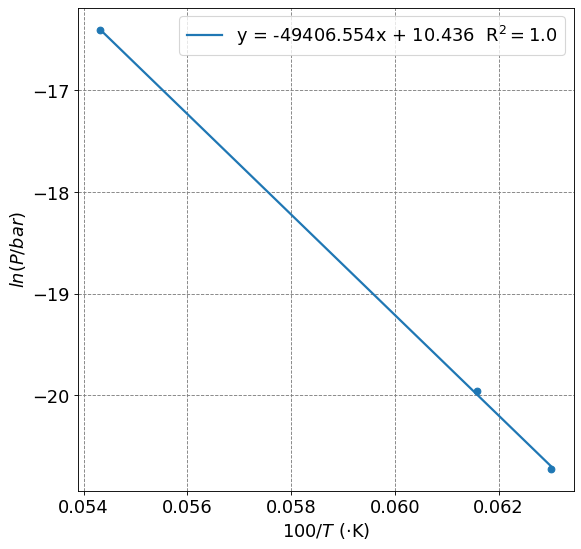

In [11]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression     # library to perform line fit
# Input data
T = np.array([1587,1624,1841])
P = np.array([1.002e-9,2.152e-9,7.499e-8])
# Manipulate data to perform fit
lnP = np.log(P)
X = (1/T).reshape((T.size,1))
# Fit linear model:
reg = LinearRegression().fit(X, lnP)
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$100/T$ ($\cdot$K)",size=fontsize)
ax.set_ylabel("$ln(P/bar)$",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
plt.scatter(100/T,lnP)
label = "y = " + str(np.round(reg.coef_[0],3)) + "x + " + str(np.round(reg.intercept_,3)) + "  R$^2=$" + str(np.round(reg.score(X,lnP),2)) 
plt.plot(100/T,reg.predict(X),lw=2, label=label)
plt.legend(fontsize=fontsize)

In [10]:
print("Delta H = ", np.round(-reg.coef_[0]*8.314/1000,1), "kJ/mol")

Delta H =  410.8 kJ/mol
